In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("/home/ramchowdary/Downloads/haberman.csv")

In [49]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [50]:
# status is the target variable
# so we can change the 1 = yes and 2 =NO

In [52]:
df["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

In [53]:
df['status']=df['status'].map({1:"yes",2:'NO'})
# to convert the value 1 to YES and 2 to NO

In [54]:
# so this is unbalanced data

In [55]:
# how many features
df.shape # it containing 306 rows and 4 columns

(306, 4)

In [56]:
df.columns # to know the column names

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [57]:
df.info()
# don't have any null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [58]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [59]:
# above given data is impbalanced

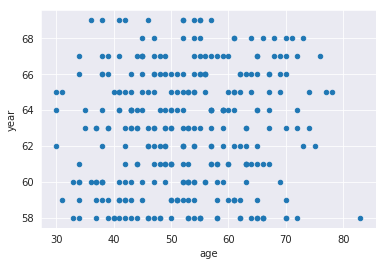

In [61]:
df.plot(kind='scatter',x = "age",y="year")
plt.show()

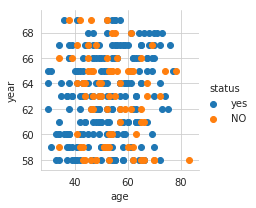

In [62]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",height=3).map(plt.scatter,"age","year").add_legend()
plt.show()

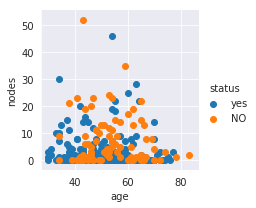

In [63]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="status",height=3).map(plt.scatter,"age","nodes").add_legend()
plt.show()

In [64]:
# there is no effect to find the 2d scatterplot
# to identify which one is important feature

In [65]:
# covarience
df.cov()

,age,year,nodes
age,116.714583,3.142912,-4.907082
year,3.142912,10.558631,-0.087946
nodes,-4.907082,-0.087946,51.691118


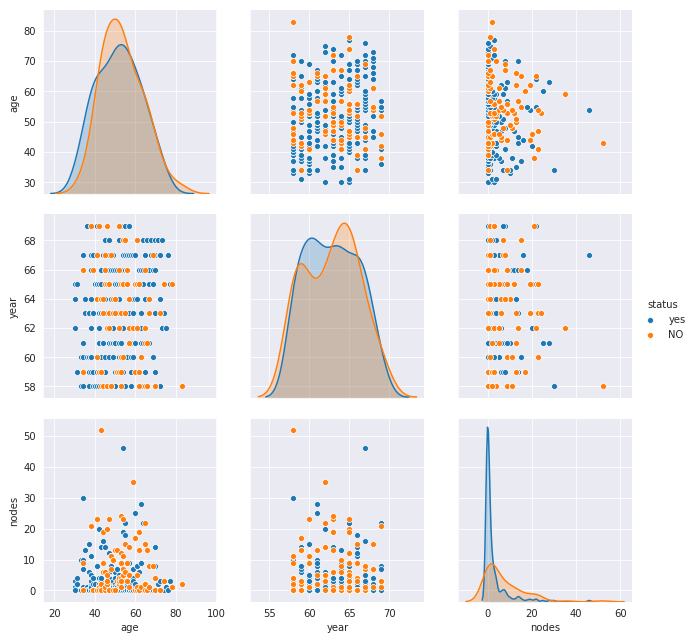

In [66]:
sns.pairplot(df,hue="status",height=3)
plt.show()

In [74]:
# this pairplot is also not useful here

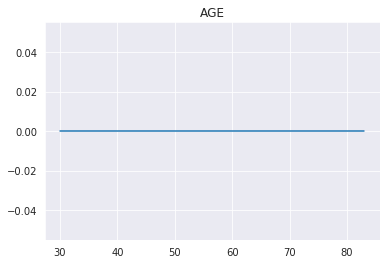

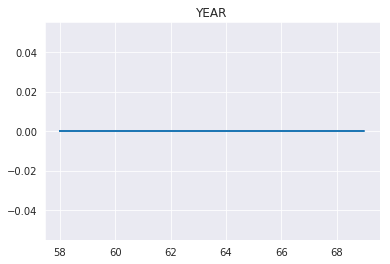

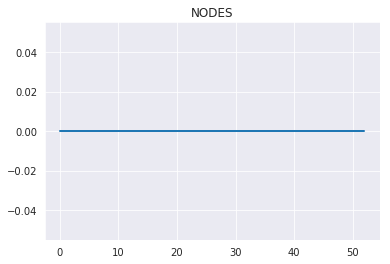

In [73]:
# 1-d scatter plot
plt.title("AGE")
plt.plot(df['age'],np.zeros_like(df['age']))
plt.show()
# 1d plot for year
plt.title("YEAR")
plt.plot(df['year'],np.zeros_like(df['year']))
plt.show()
# 1d scatter plot for nodes
plt.title("NODES")
plt.plot(df['nodes'],np.zeros_like(df['nodes']))
plt.show()

In [75]:
# here to find the status for each feature
df_y = df.loc[df['status']=="yes"]
df_n = df.loc[df['status']=='No']

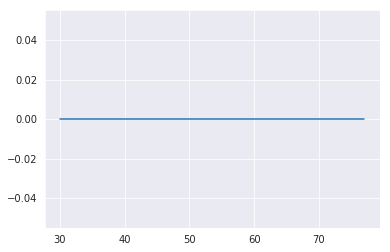

In [85]:
plt.plot(df_y['age'],np.zeros_like(df_y['age']))

# univariateANALYSIS

In [87]:
# atleast using univariate analysis which one is important faeture to classify 
# find what feature variable is seperated the STATUS with less or no OVERLAPPING


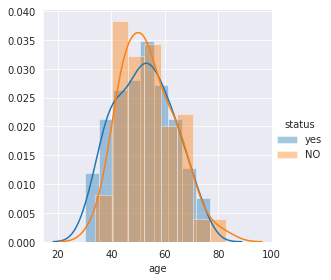

In [79]:
# to plot histograms
sns.FacetGrid(df,hue="status",height=4).map(sns.distplot,"age").add_legend()
plt.show()

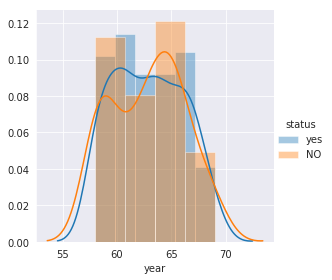

In [82]:
sns.FacetGrid(df,hue="status",height=4).map(sns.distplot,'year').add_legend()
plt.show()
# can't seperate

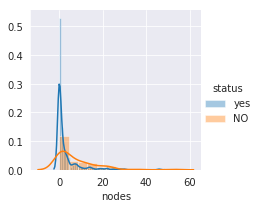

In [84]:
sns.FacetGrid(df,hue="status",height=3).map(sns.distplot,'nodes').add_legend()
plt.show()
# can't separable using year variable

In [88]:
# from the above plots can't seperable based on the specific feature variable
# at the above plots i think nodes are better. compare to the age,year

# finally using the CUMULATIVE DISTRIBUTION FUNCTION 

In [90]:
# using this CDF we can classify the status or how accurate the model
# generally pdf is the PROBABILITY DISTRIBUTION FUNCTION 
# pdf can built by taking the histograms and smoothing it up
# cumulative sums of PDF is CDF

In [91]:
# generally INTEGRATION of the pdf  we gets CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


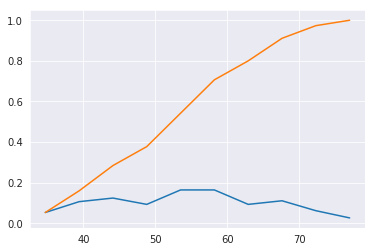

In [96]:
counts,bin_edges = np.histogram(df_y['age'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
# cdf
cdf = np.cumsum(pdf)
# plot
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [97]:
# it represents the status is "yes" with feature age

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


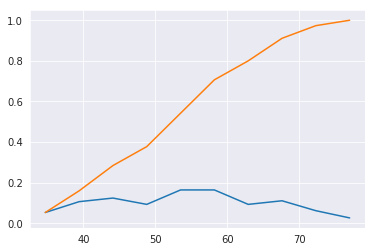

In [107]:
counts,bin_edges = np.histogram(df_y['age'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
# status:NO

counts,bin_edges = np.histogram(df_n['age'],bins=10,density=True)
pdf = counts/sum(counts)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

# I HAVE AN DOUBT PLZ REFER ONCE

# MEAN , MEDIAN ,VARIANCE ,STD_DEV

In [108]:
df.mean()

age      52.457516
year     62.852941
nodes     4.026144
dtype: float64

In [111]:
df.std() # standard deviation

age      10.803452
year      3.249405
nodes     7.189654
dtype: float64

In [113]:
df.median() # middle value

age      52.0
year     63.0
nodes     1.0
dtype: float64

In [121]:
# median Absolute Deviation
# it is like std when median is like mean

In [122]:
from statsmodels import robust
robust.mad(df['age'])

11.860817748044816

In [123]:
robust.mad(df['year'])

4.447806655516806

In [124]:
robust.mad(df['nodes'])

1.482602218505602

# boxplots

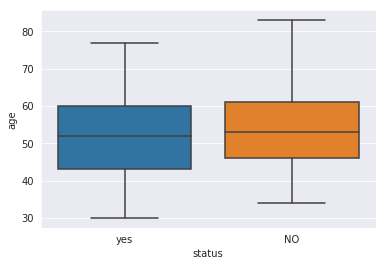

In [126]:
sns.boxplot(x="status",y="age",data=df)
plt.show()

In [127]:
# observe both 75% is roughly same for YES ,NO
# but whiskers are not same
# at the age 45  50th percentile of the STATUS  YES , at 60 = 75%, at age 45 = 25% of the status "yes"
#  at age 60 70% of the peoples are alive

# SIMILARLY OBSERVE IN THE STATUS NO :
# at the age 48 =25% , age 53=50% ,age=62=75% are to dead


In [128]:
#from those plots misclassification of status is HIGH.
# so we can't seperable using feature variable AGE

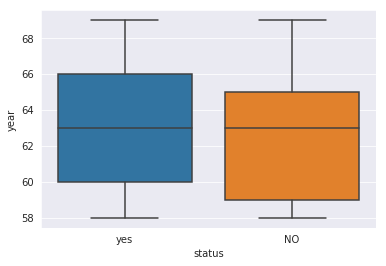

In [129]:
sns.boxplot(x="status",y="year",data=df)
plt.show()
# this is also observe like above
# find the misclassification of the status 

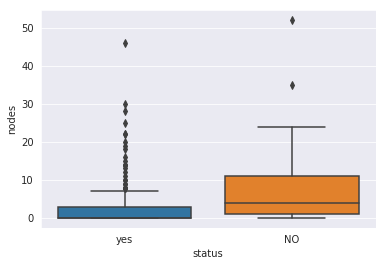

In [130]:
sns.boxplot(x="status",y="nodes",data=df)
plt.show()

In [131]:
# i think it give some 75% accuracy to classify

# violin plots

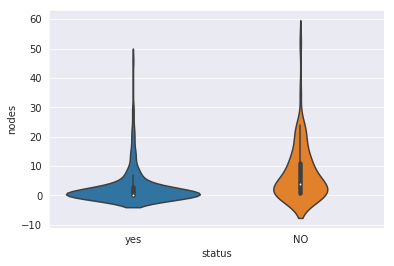

In [132]:
sns.violinplot(x="status",y='nodes',data=df,height=10)
plt.show()

In [133]:
# it is the combination of boxplot and histograms
# so it is also can't seperate using this plotting

# multivariate probability density,contour plot

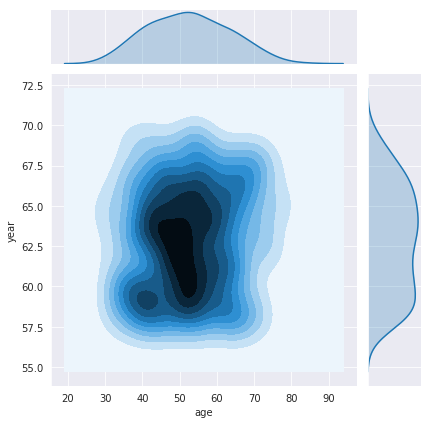

In [136]:
sns.jointplot(x='age',y='year',data=df,kind='kde')
plt.show()

In [137]:
# observation


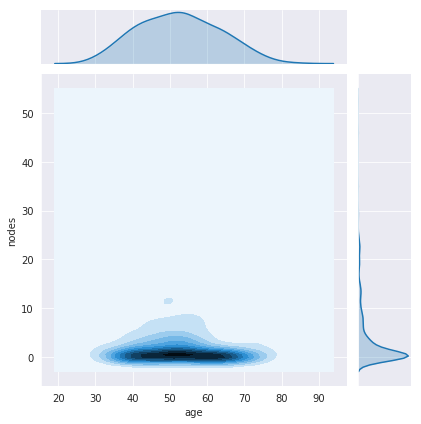

In [139]:
sns.jointplot(x='age',y='nodes',data=df,kind='kde')
plt.show()

In [140]:
# observation:


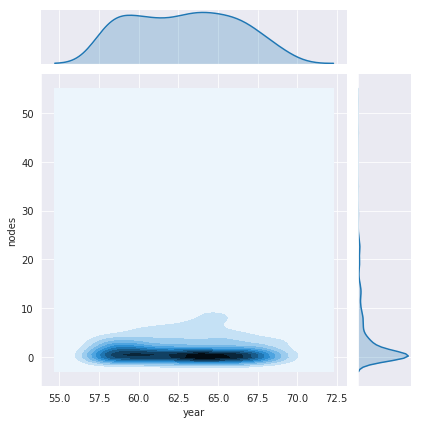

In [141]:
sns.jointplot(x='year',y='nodes',data=df,kind='kde')
plt.show()